In [1]:
#Summary of all the import 

import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC

#from sklearn import tree
#from os import system

from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz

pd.options.display.float_format = '{:,.2f}'.format


In [2]:
termDepositor = pd.read_csv("bank-full.csv")
termDepositor.head(100) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


### Univariate & Multivariate Analysis

In [3]:
termDepositor.shape

(45211, 17)

In [4]:
termDepositor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
round(termDepositor.isna().sum()*100/termDepositor.shape[0],2) #check for % null values

age         0.00
job         0.00
marital     0.00
education   0.00
default     0.00
balance     0.00
housing     0.00
loan        0.00
contact     0.00
day         0.00
month       0.00
duration    0.00
campaign    0.00
pdays       0.00
previous    0.00
poutcome    0.00
Target      0.00
dtype: float64

In [6]:
termDepositor['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
termDepositor['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
termDepositor['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [9]:
termDepositor['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [10]:
termDepositor['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [11]:
termDepositor['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [12]:
termDepositor['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [13]:
termDepositor['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
termDepositor['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [15]:
termDepositor['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [16]:
termDepositor['duration'].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [17]:
termDepositor['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [18]:
termDepositor['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [19]:
termDepositor['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [20]:
termDepositor['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
termDepositor['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [22]:
termDepositor.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


In [23]:
termDepositor [(termDepositor['Target'] == 'yes') ]['poutcome'].value_counts()

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

In [24]:
termDepositor [(termDepositor['balance'] > 0) ]['Target'].value_counts()

no     33144
yes     4787
Name: Target, dtype: int64

In [25]:
termDepositor [(termDepositor['balance'] > 1428) ]['Target'].value_counts()

no     9472
yes    1825
Name: Target, dtype: int64

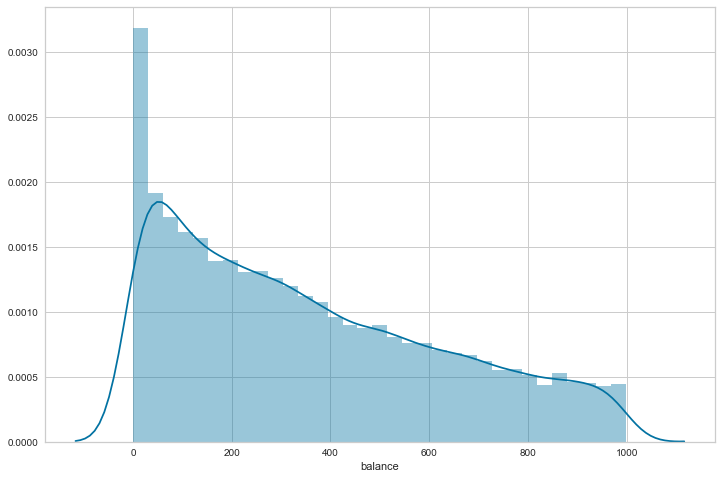

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(termDepositor[(termDepositor['balance'] > 0) & (termDepositor['balance'] < 1000)]['balance']);

In [27]:
termDepositor [(termDepositor['balance'] == 0) ]['Target'].value_counts()

no     3222
yes     292
Name: Target, dtype: int64

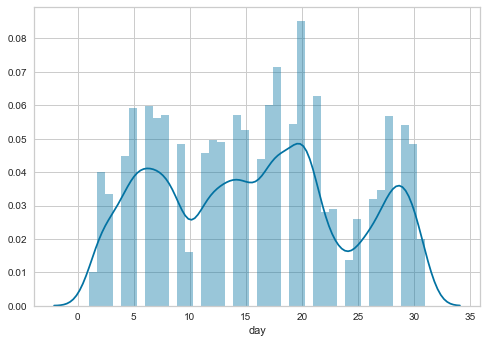

In [28]:
sns.distplot(termDepositor['day'])

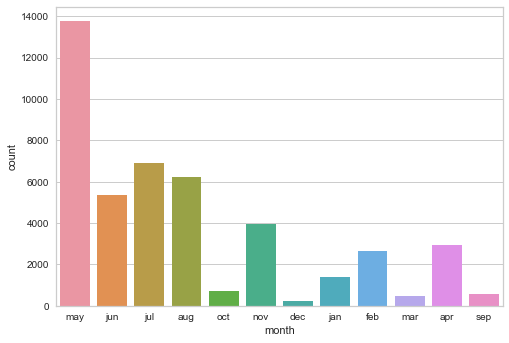

In [29]:
sns.countplot(termDepositor['month'])

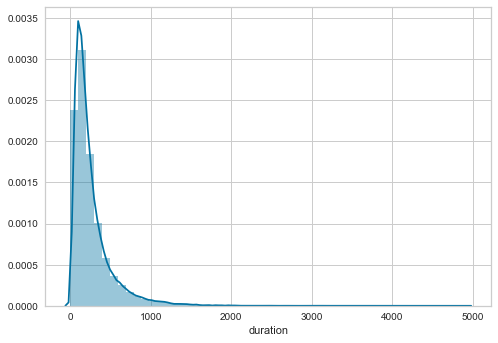

In [30]:
sns.distplot(termDepositor['duration'])

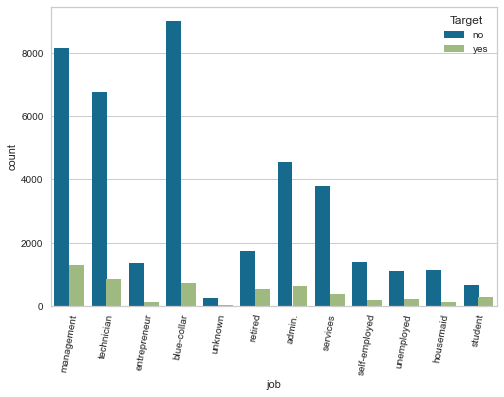

In [31]:
plt.xticks(rotation=80)
sns.countplot(termDepositor['job'],hue=termDepositor['Target'])
plt.show()

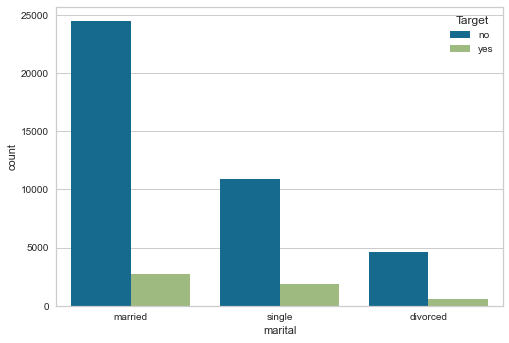

In [32]:
sns.countplot(termDepositor['marital'],hue=termDepositor['Target'])

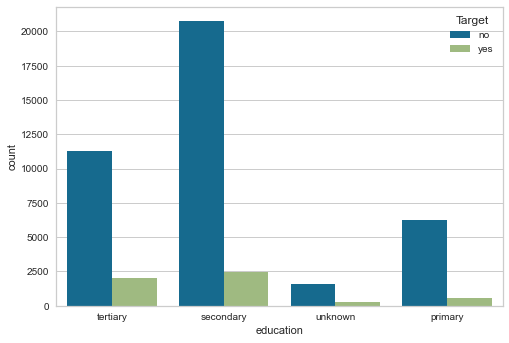

In [33]:
sns.countplot(termDepositor['education'],hue=termDepositor['Target'])


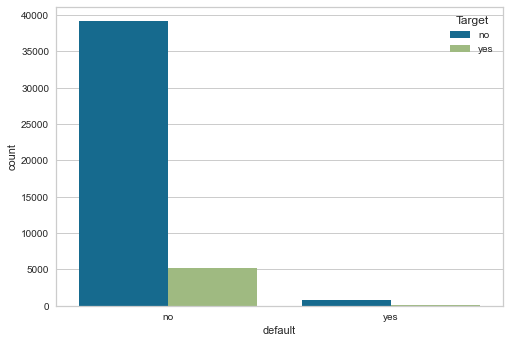

In [34]:
sns.countplot(termDepositor['default'],hue=termDepositor['Target'])

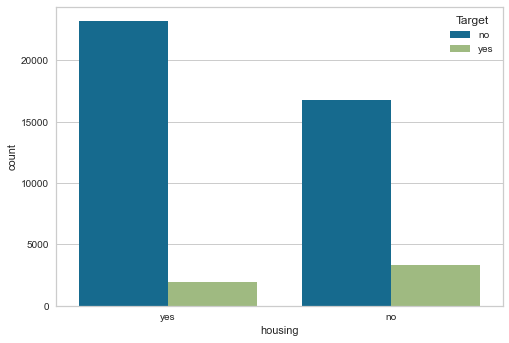

In [35]:
sns.countplot(termDepositor['housing'],hue=termDepositor['Target'])

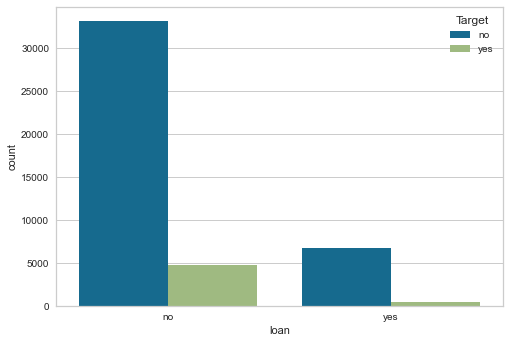

In [36]:
sns.countplot(termDepositor['loan'],hue=termDepositor['Target'])

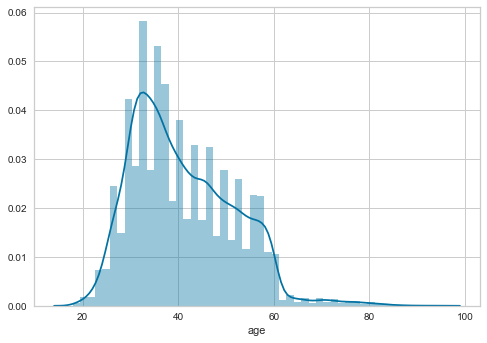

In [37]:
sns.distplot(termDepositor['age'])

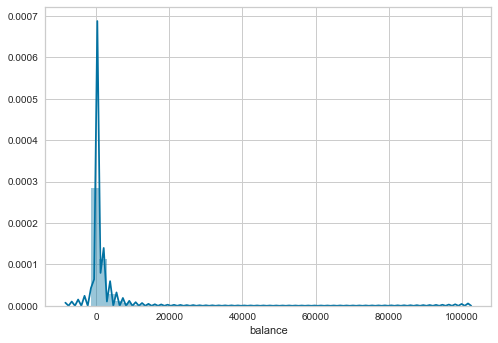

In [38]:
sns.distplot(termDepositor['balance'])

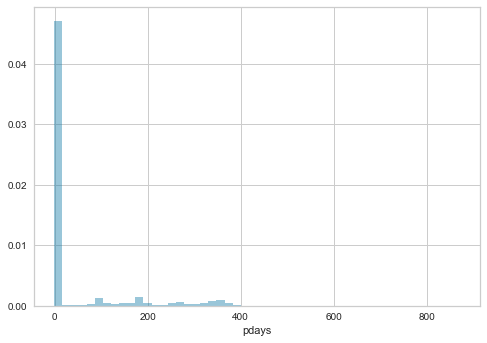

In [39]:
sns.distplot(termDepositor['pdays'])

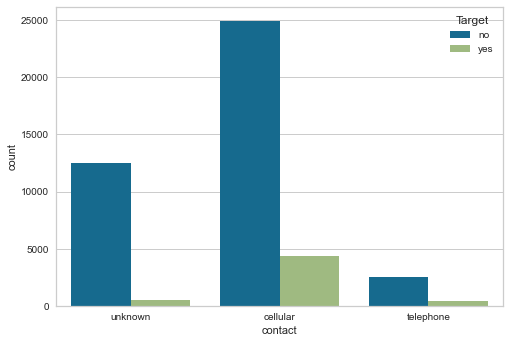

In [40]:
sns.countplot(termDepositor['contact'],hue=termDepositor['Target'])

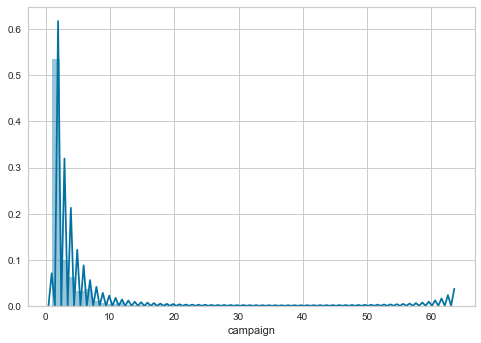

In [41]:
sns.distplot(termDepositor['campaign'])

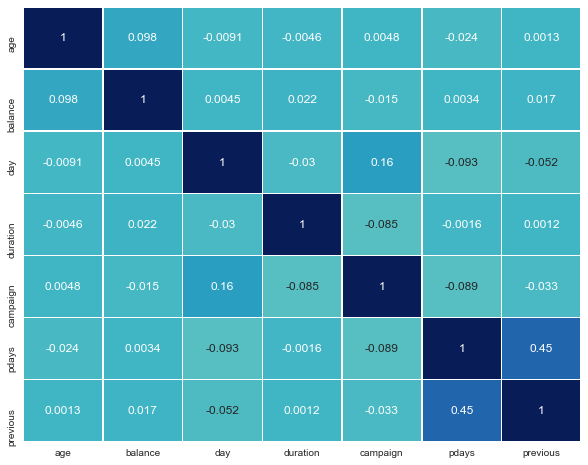

In [42]:
plt.figure(figsize=(10,8))

sns.heatmap(termDepositor.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

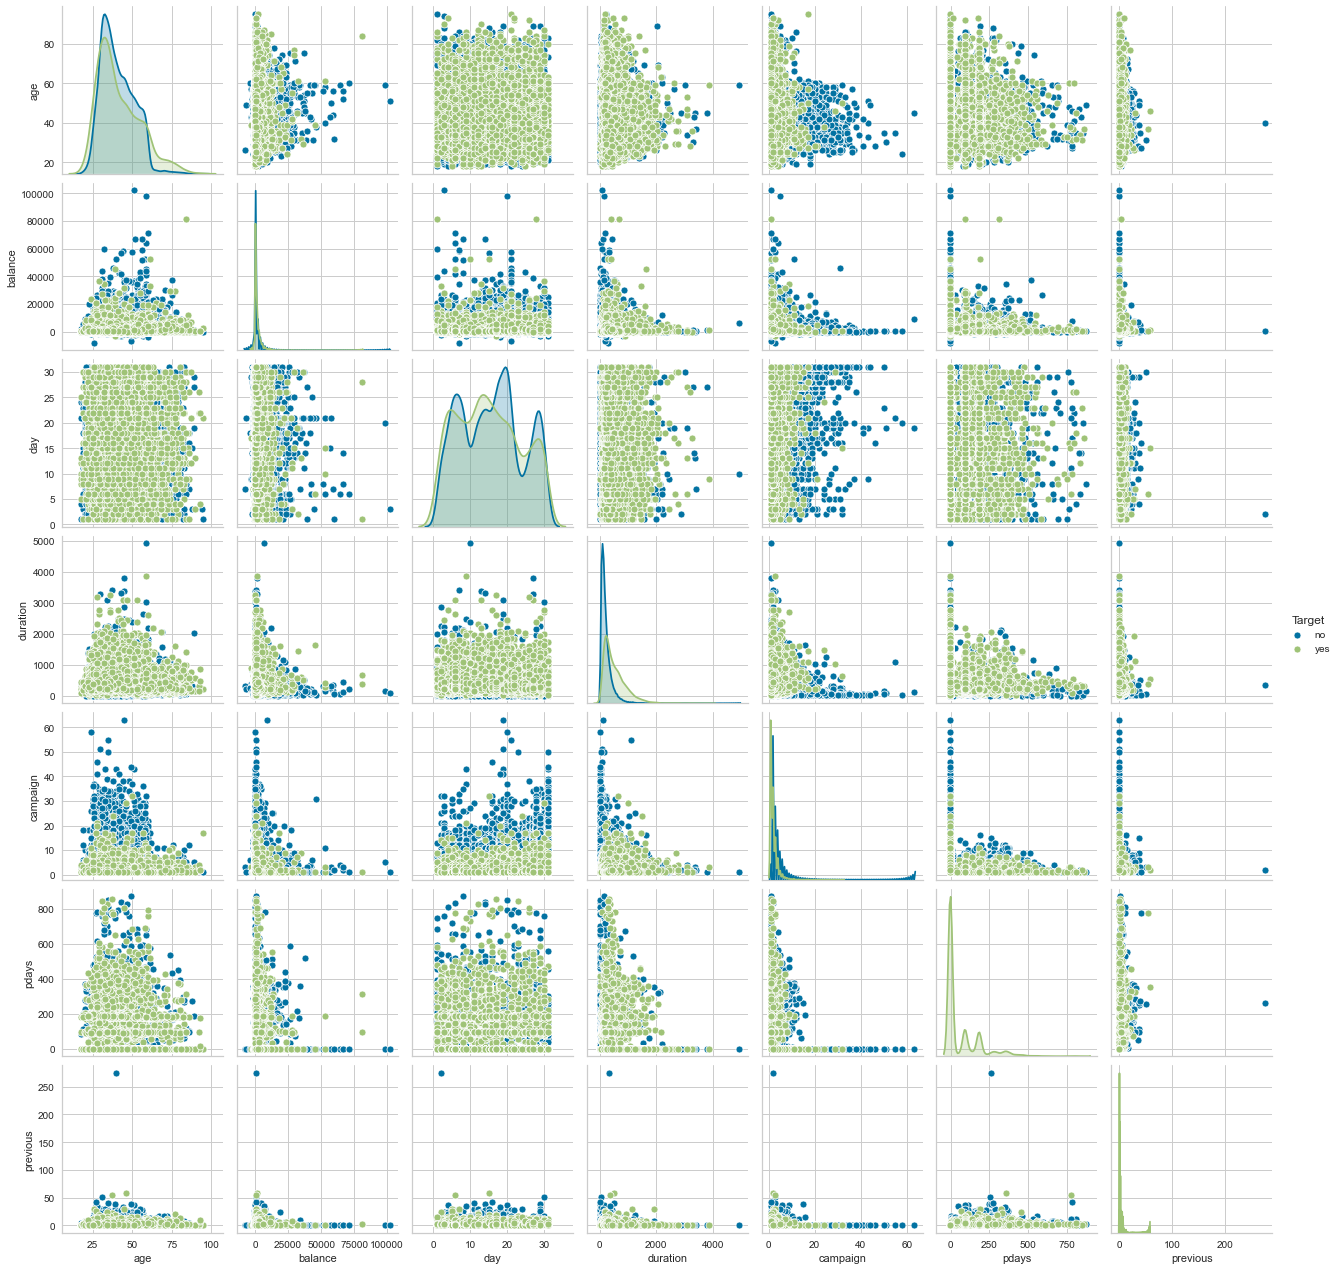

In [43]:
sns.pairplot(termDepositor, hue = 'Target')

**Insights**

- No null values in any columns
- Most of the features are categorical except age, balance, duration, campaign, pdays and previous
- previous and pdays are positively correlated & most other feature are negatively correlated
- There is skewness in the features such as balance, duration, pdays
- Don't see any data imputation required for model preparation

### Model Data Preparation & Model Analysis

In [44]:
#Dropping poutcome since cannot intrepret unknown value. 
#Also performing one hot encoding for logistic regression
termDepositor_dummies = pd.get_dummies(termDepositor.drop(['poutcome'],axis=1),drop_first=True)
termDepositor_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [45]:
#Creating Dependent & Independent variables
X = termDepositor_dummies.drop(['Target_yes'],axis=1)
Y = termDepositor_dummies['Target_yes']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
35272,39,4239,7,40,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10705,44,647,16,226,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
43536,46,429,26,465,2,369,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6960,55,81,28,172,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
41892,28,172,19,123,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

In [48]:
model_score = model.score(x_train, y_train)
print("Training Model Score    : {0:0.2f}% ".format(model_score* 100))

Training Model Score    : 89.28% 


In [49]:
model_score = model.score(x_test, y_test)
print("Testing Model Score    : {0:0.2f}% ".format(model_score* 100))

Testing Model Score    : 90.02% 


In [50]:
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.3005215123859192

Precision: 0.6212938005390836

F1 Score: 0.40509666080843587

Roc Auc Score: 0.6385816206983628


In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistric Regression'], 'accuracy': (model_score* 100)})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistric Regression,90.02


In [52]:
replaceStruct = {  
                 "month":     {'jan':1, 'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11, 'dec':12},
                 "contact":   {'unknown':0, 'cellular':1, 'telephone':2},
                 "default":   {"no": 0, "yes": 1 },
                 "loan":      {"no": 0, "yes": 1 }, 
                 "housing":   {"no": 0, "yes": 1 },
                 "Target":    {"no": 0, "yes": 1 },
                 "education": {'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1},
                 "marital":   {'married':2, 'single':1, 'divorced':3},
                 "job":       {'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4,
                               'unknown':0, 'retired':5, 'admin.':6, 'services':7, 'self-employed':8,
                               'unemployed':9, 'housemaid':10, 'student':11}             
                    }
termDepositor_labelencoded = termDepositor.replace(replaceStruct)
termDepositor_labelencoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,1,2,3,0,2143,1,0,0,5,5,261,1,-1,0,unknown,0
1,44,2,1,2,0,29,1,0,0,5,5,151,1,-1,0,unknown,0
2,33,3,2,2,0,2,1,1,0,5,5,76,1,-1,0,unknown,0
3,47,4,2,0,0,1506,1,0,0,5,5,92,1,-1,0,unknown,0
4,33,0,1,0,0,1,0,0,0,5,5,198,1,-1,0,unknown,0


In [53]:
features = [col for col in termDepositor_labelencoded.drop(['poutcome'],axis=1).columns if (col != 'Target' )]

X_train, X_test, y_train, y_test = train_test_split(termDepositor_labelencoded[features], termDepositor_labelencoded['Target'], test_size=.3, random_state=7)
X_train.shape, X_test.shape

((31647, 15), (13564, 15))

In [54]:
model_entropy = DecisionTreeClassifier(criterion='entropy')


In [55]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


In [57]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=6, splitter='best')
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [58]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data
pred_DT = clf_pruned.predict(X_test)
acc_DT = accuracy_score(y_test, pred_DT)

Train: 0.90
Test: 0.90


In [59]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [(acc_DT*100)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistric Regression,90.02
0,Decision Tree,89.80


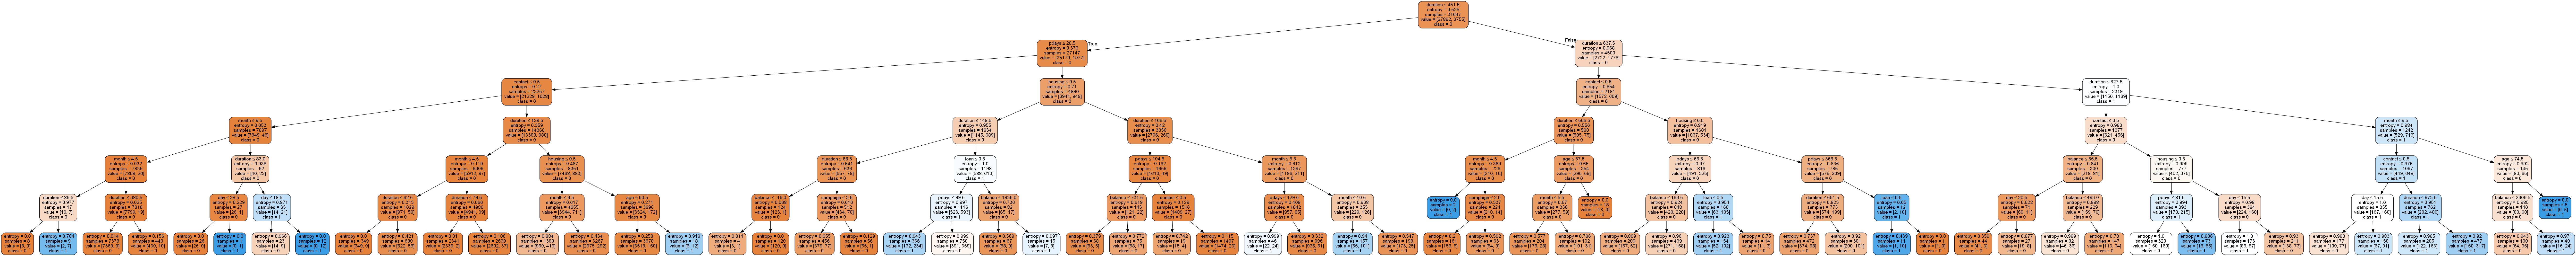

In [60]:

dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('termdeposit_pruned.png')
Image(graph.create_png())

In [61]:
rfcl = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=5)
rfcl = rfcl.fit(X_train, y_train)
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [62]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [(acc_RF*100)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistric Regression,90.02
0,Decision Tree,89.80
0,Random Forest,90.45


In [63]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=7)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [64]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'accuracy': [(acc_AB*100)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistric Regression,90.02
0,Decision Tree,89.80
0,Random Forest,90.45
0,AdaBoost,89.27


In [65]:
bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=7)
bgcl = bgcl.fit(X_train, y_train)
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [66]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [(acc_BG*100)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistric Regression,90.02
0,Decision Tree,89.80
0,Random Forest,90.45
0,AdaBoost,89.27
0,Bagging,90.25


In [67]:
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=7)
gbcl = gbcl.fit(X_train, y_train)
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [68]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [(acc_GB*100)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistric Regression,90.02
0,Decision Tree,89.80
0,Random Forest,90.45
0,AdaBoost,89.27
0,Bagging,90.25
0,Gradient Boost,90.54


In [69]:
xgbc = XGBClassifier(n_estimators = 100, learning_rate = 0.1, random_state=7, max_depth=6)
xgbc = xgbc.fit(X_train, y_train)
pred_XGB = xgbc.predict(X_test)
acc_XGB = accuracy_score(y_test, pred_XGB)

In [70]:
tempResultsDf = pd.DataFrame({'Method':['Extreme Gradient Boost'], 'accuracy': [(acc_XGB*100)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistric Regression,90.02
0,Decision Tree,89.80
0,Random Forest,90.45
0,AdaBoost,89.27
0,Bagging,90.25
0,Gradient Boost,90.54
0,Extreme Gradient Boost,90.71


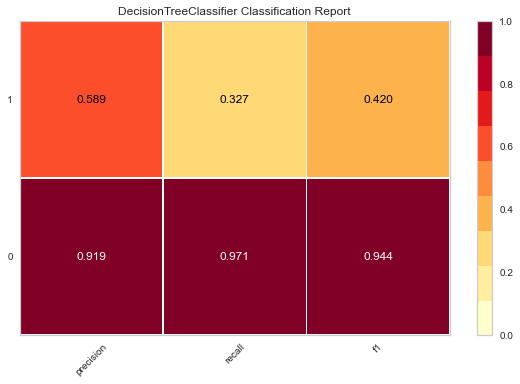

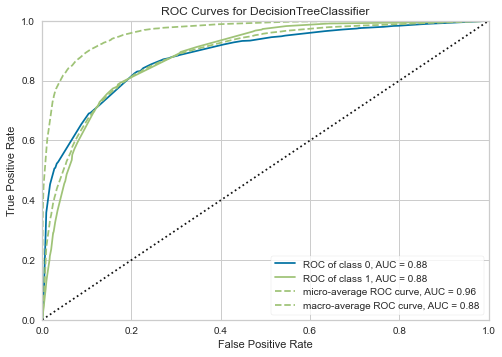

In [71]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=6, splitter='best'))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=6, splitter='best'))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

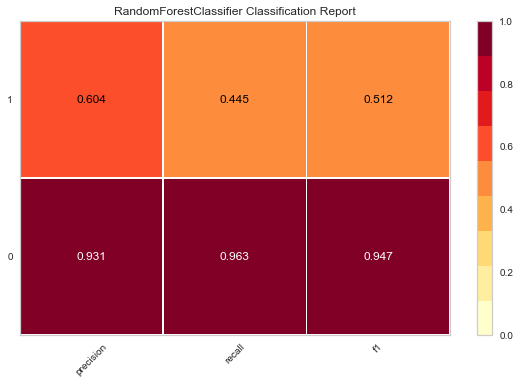

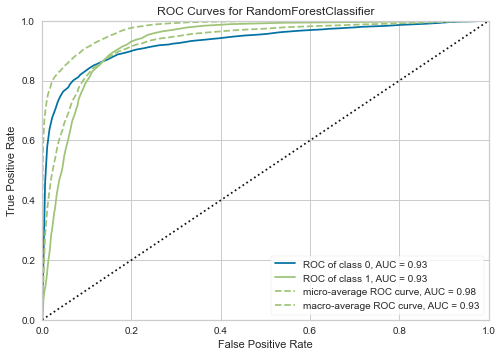

In [72]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=5))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=5))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

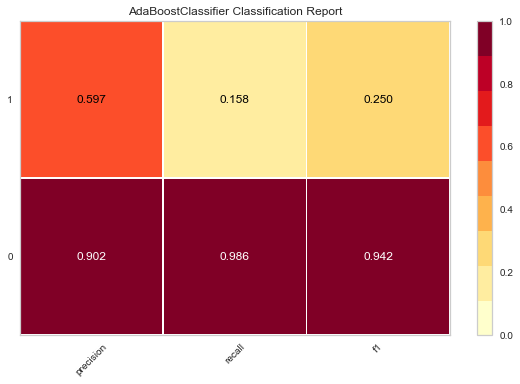

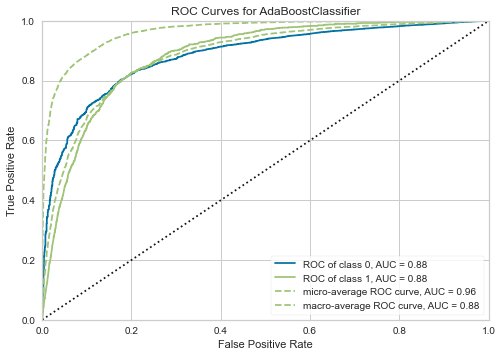

In [73]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=7))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=7))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

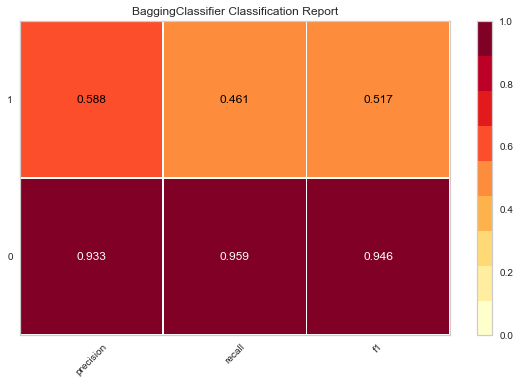

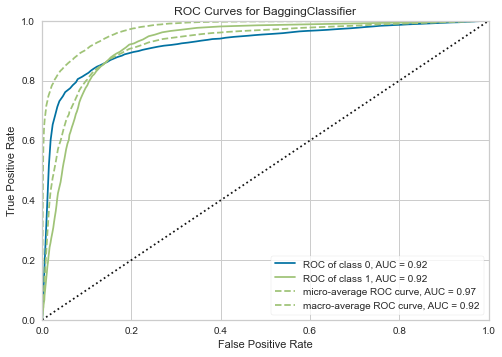

In [74]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=7))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=7))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

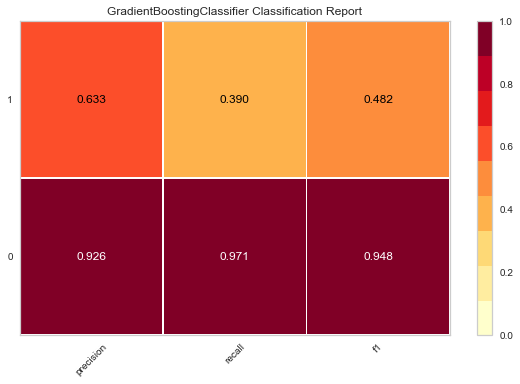

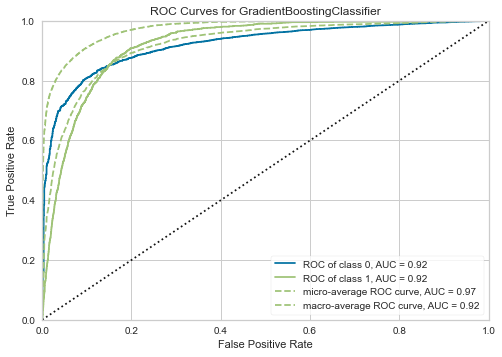

In [75]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=7))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=7))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

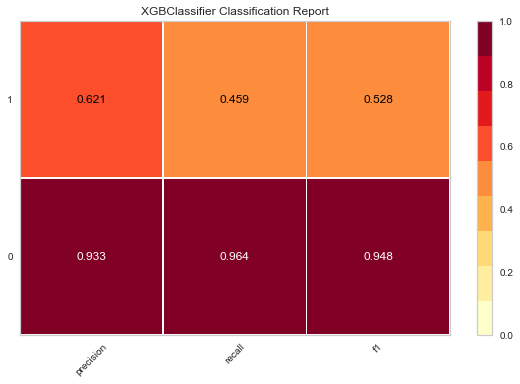

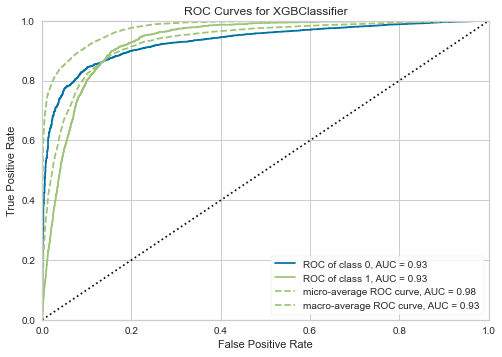

In [76]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(XGBClassifier(n_estimators = 100, learning_rate = 0.1, random_state=7, max_depth=6))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(XGBClassifier(n_estimators = 100, learning_rate = 0.1, random_state=7, max_depth=6))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Conclusion

Calculated various performance metrics such Accuracy, Precision, Recall, F1 & AUC score for different models such as Logistic Regression, Decision Tree, Random Forest, Adaboost, Bagging, Gradientboost and XGBoost.

Looking at accuracy most of the models have performed pretty close but i think for this problem statement we need to consider Precision as the metric to choose the best model.

**GradientBoost would be the best model based on Precision metric for this problem statement**